#   Анализ оттока клиентов из банка 

**Цель**: Проанализировать клиентов  банка и выделить сегменты клиентов, которые склонны уходить из банка
    
**Данные**  
User_id – идентификатор пользователя;  
Score – баллы кредитного скоринга;  
City – город;  
Genger – пол;  
Age – возраст;  
Balance – баланс на счёте;  
Products– количество продуктов, которыми пользуется клиент;  
CreditCart – имеется ли кредитная карта;  
Last_activity – активный клиент или нет (в течение 30 дней);  
Еstimated_salary – заработная плата клиента;  
Churn – ушёл или нет;  
Equity – кол-во баллов собственности;

## Загрузка данных и описание

In [1]:
!pip install phik

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, levene

In [3]:
df=pd.read_csv(r"D:\Загрузки\bank_scrooge.csv")

In [4]:
def analysis_df(df):

    print("Info:")
    print(df.info())
    print("\n")

    print("Head:")
    display(df.head())
    print("\n")

    print("Describe:")
    display(df.describe())
    print("\n")

    print("Value Counts:")
    for column in df.columns:
        if df[column].dtype == 'object':
            display(df[column].value_counts().to_frame())
            print("\n")
            print('List of Unique')
            print(df[column].unique())
    print("\n")
    
    print('Duplicates:')
    print(df.duplicated(['USERID']).sum())
    display(df[df.duplicated(['USERID'], keep=False)].sort_values(by='USERID').head(20))

In [5]:
analysis_df(df)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
None


Head:


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1




Describe:


,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000




Value Counts:


,city
Ярославль,5888
Рыбинск,2695
Ростов,1417




List of Unique
['Рыбинск' 'Ярославль' 'Ростов']


,gender
М,5005
Ж,4995




List of Unique
['Ж' 'М']


Duplicates:
73


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


**Вывод**  
Видим пропуски в столбцах age, balance;  
Нужно изменить названия колонок;  
Нужно изменить типы данных в следующих столбцах:  score, age на int, credit_card, last_activity, churn на bool;  
Есть дубликаты по столбцу user_id. Судя по таблице, эти люди переехали в другой город и пользовались другим отделением банка. Удалять не будем

## Подготовка данных

Посмотрим на записи, где количество продуктов - 0.  
Это ошибка, т.к. человек не может быть клиентом банка, не имея ни одного продукта в нем.

In [6]:
df[df['products']==0]

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


In [7]:
# Удалим строку
df= df[df['products']!=0]

In [8]:
df = df.rename(columns={'USERID': 'user_id', 'EST_SALARY':'estimated_salary'})

In [9]:
df['age_missing'] = df['age'].isna().astype(int)
df['balance_missing'] = df['balance'].isna().astype(int)

In [10]:
corr_df=df[['score', 'equity', 'products', 'estimated_salary', 'credit_card', 'last_activity', 'churn', 'city', 'gender', 'age_missing', 'balance_missing']]

In [11]:
phik = corr_df.phik_matrix(interval_cols=['score', 'equity', 'products', 'estimated_salary'])[['age_missing', 'balance_missing']]

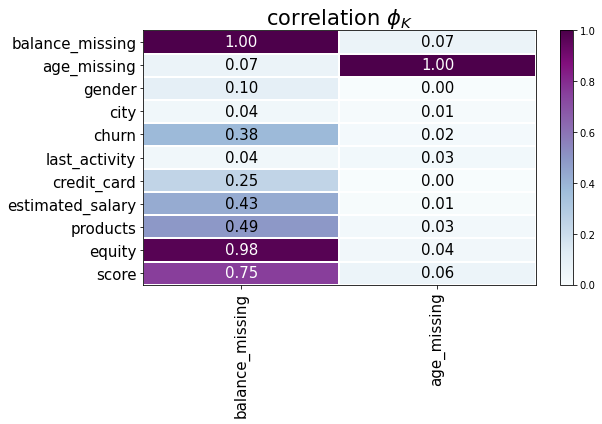

In [12]:
plot_correlation_matrix(phik.values, 
                        x_labels=phik.columns, 
                        y_labels=phik.index, 
                        vmin=0, vmax=1, color_map="BuPu", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(9, 6))
plt.tight_layout()

**Вывод**  
Пропуски в значениях возраста случайны, а так как их немного, можно удалить эти строки.  
Пропуски в столбце balance сильно коррелируют со значениями в столбце equity (кол-во баллов собственности)

In [13]:
# Удалим строки, где пропущен возраст
df=df.dropna(subset=['age'])

In [14]:
# Пропуски в столбце balance заменим на медианное значение в зависимости от количества баллов собственности
df['balance'] = (df['balance']
    .fillna(df.groupby(['equity'])['balance']
    .transform('median'))) 

In [15]:
df['score'] = df['score'].astype('int')
df['age'] = df['age'].astype('int')
df['credit_card'] = df['credit_card'].astype('bool')
df['last_activity'] = df['last_activity'].astype('bool')
df['churn'] = df['churn'].astype('bool')

**Общий Вывод**  
Изменили названия столбцов;  
Привели данные к нужному типу;  
Проверили дубликаты;  
Удалили строки с пропусками в столбце возраст, а пропуски в столбце баланса заменили на медианное значение в зависимости от количества баллов собственности
Пропуски в столбце age абсолютно случайны (MCAR)  
Пропуски в столбце balance случайны (MAR)

## EDA

### Баллы кредитного скоринга

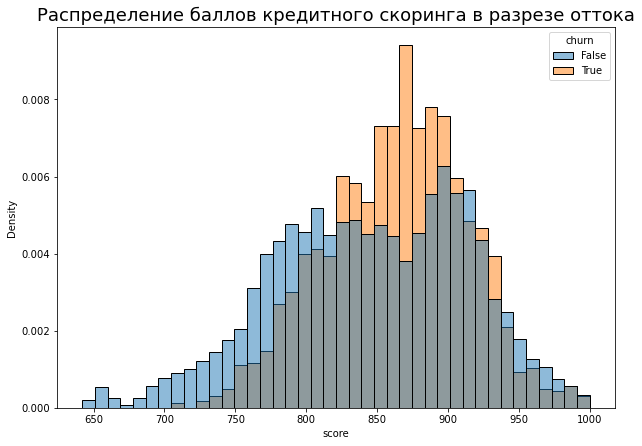

In [16]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data=df, x='score', hue='churn', stat='density', common_norm=False)
plt.title('Распределение баллов кредитного скоринга в разрезе оттока', fontsize=18)
plt.show()

**Вывод**  
Больше склонны к уходу из банка клиенты с кредитным скорингом в диапазоне от 825 до 910

### Возраст клиентов

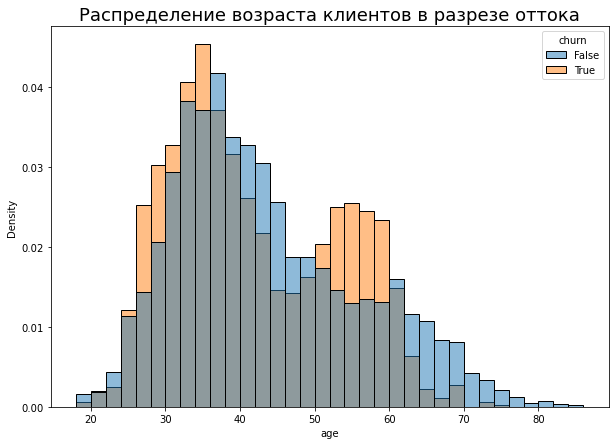

In [17]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data=df, x='age', hue='churn', stat='density', common_norm=False, bins=34)
plt.title('Распределение возраста клиентов в разрезе оттока', fontsize=18)
plt.show()

**Вывод**  
Больше склонны к уходу из банка клиенты в возрасте от 24 до 36 и от 50 до 60

### Баланс на счете

In [18]:
# Посмотрим, в каком диапазоне лежит большинство значений баланса, тк имеются аномально высокие значения
np.percentile(df['balance'], [95])

array([1839891.334])

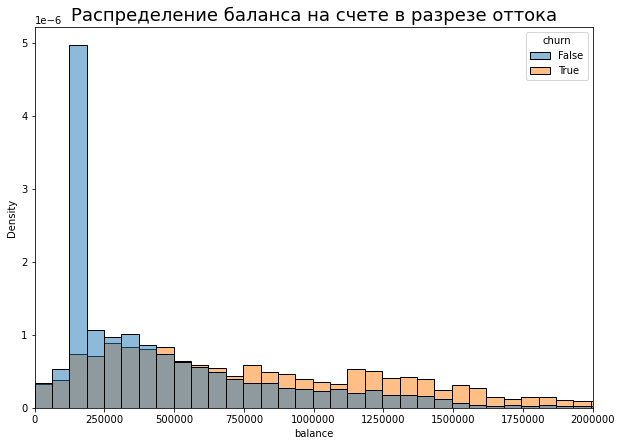

In [19]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlim(0,2000000)
sns.histplot(data=df, x='balance', hue='churn', stat='density', common_norm=False)
plt.title('Распределение баланса на счете в разрезе оттока', fontsize=18)
plt.ticklabel_format(style='plain', axis = 'x')
plt.show()

**Вывод**  
Больше склонны к уходу из банка клиенты, чей баланс на счете превышает 750.000 

### Зарплата клиентов

In [20]:
np.percentile(df['estimated_salary'], [95])

array([316366.936])

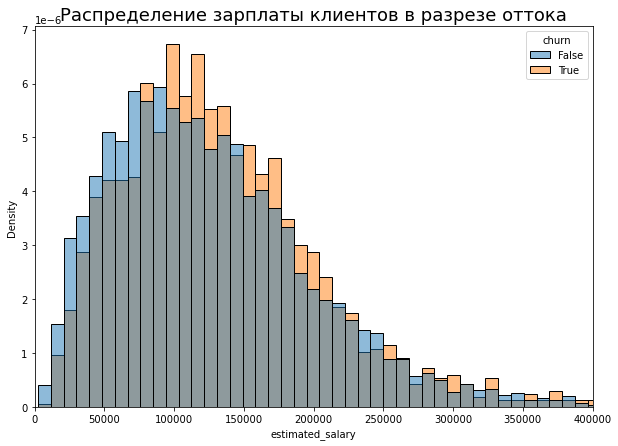

In [21]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlim(0,400000)
sns.histplot(data=df, x='estimated_salary', hue='churn', stat='density', common_norm=False)
plt.title('Распределение зарплаты клиентов в разрезе оттока', fontsize=18)
plt.ticklabel_format(style='plain', axis = 'x')
plt.show()

**Вывод**  
Больше склонны к уходу из банка клиенты, зарплата которых находится в диапазоне от 95.000 до 140.000 и от 150.000 до 210.000

### Баллы собственности

In [22]:
def bar(x, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(data=df, x=x, y='churn', ax=ax, palette='crest', ci=None)
    ax.axhline(df['churn'].mean(), color='red', linewidth=2, linestyle='--')
    ax.set_title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

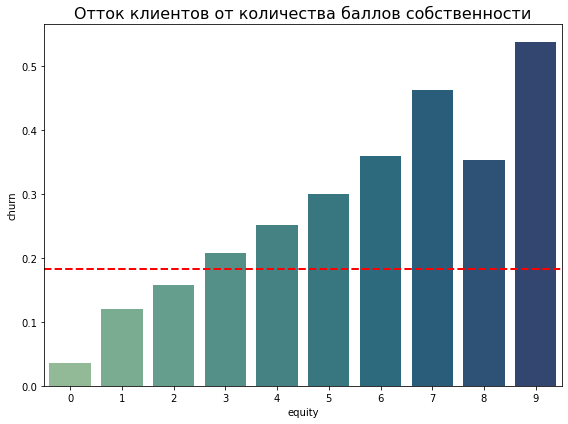

In [23]:
bar('equity', 'Отток клиентов от количества баллов собственности')

**Вывод**  
Больше склонны к уходу из банка клиенты, у которых не менее 3 баллов собственности.

### Город

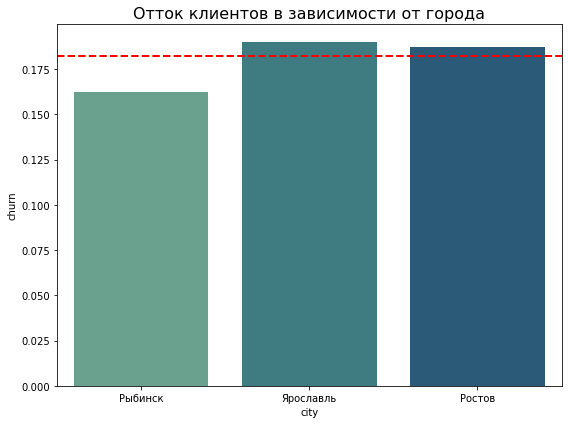

In [24]:
bar('city', 'Отток клиентов в зависимости от города')

**Вывод**  
Больше склонны к уходу из банка клиенты из Ярославля и Ростова

### Пол

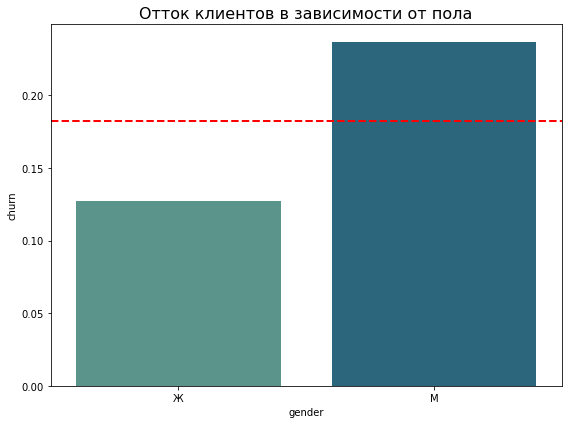

In [25]:
bar('gender', 'Отток клиентов в зависимости от пола')

**Вывод**  
Больше склонны к уходу из банка мужчины

### Количество продуктов

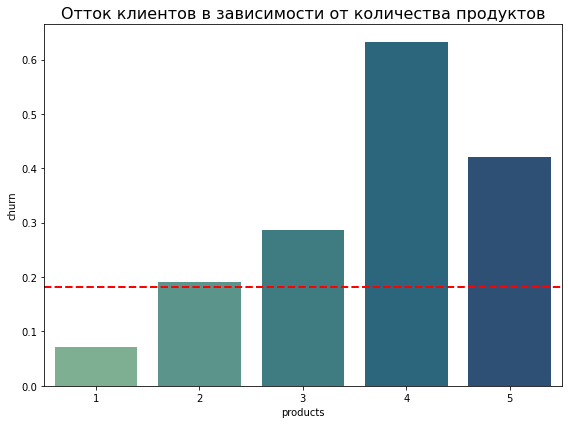

In [26]:
bar('products', 'Отток клиентов в зависимости от количества продуктов') 

**Вывод**  
Больше склонны к уходу из банка клиенты, у которых 3 и более продукта. 

### Кредитная карта

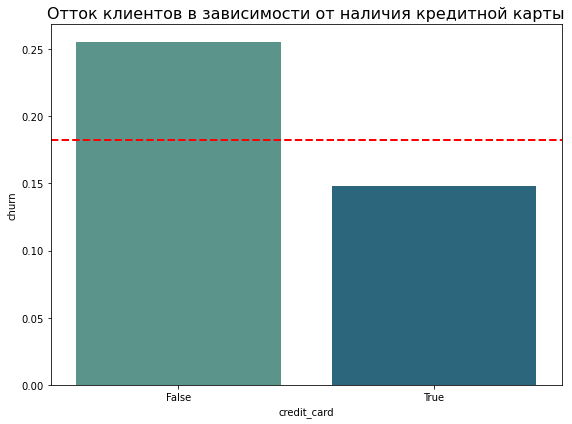

In [27]:
bar('credit_card', 'Отток клиентов в зависимости от наличия кредитной карты') 

**Вывод**  
Больше склонны к уходу из банка клиенты, которые не имеют кредитной карты

### Активность в течение 30 дней

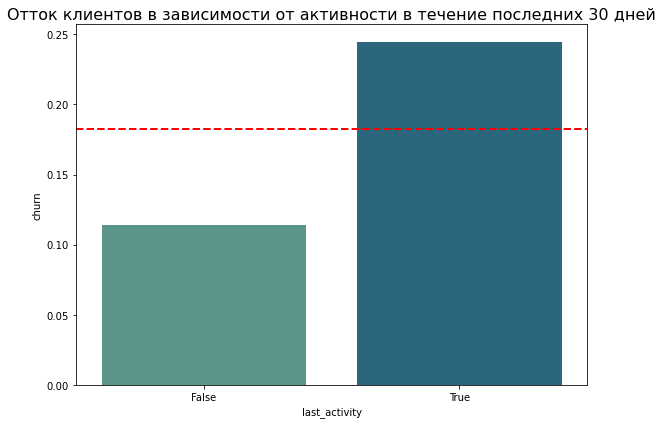

In [28]:
bar('last_activity', 'Отток клиентов в зависимости от активности в течение последних 30 дней') 

**Вывод**  
Больше склонны к уходу из банка клиенты, которые не были активны на протяжении 30 дней

### Корреляция

In [29]:
corr_churn_df = df[['gender', 'city', 'score', 'equity', 'products', 'estimated_salary', 'credit_card', 'last_activity', 'churn', 'age', 'balance']]
phik_churn = corr_churn_df.phik_matrix(interval_cols=['score', 'age', 'balance', 'estimated_salary'])

In [30]:
phik_churn

,gender,city,score,equity,products,estimated_salary,credit_card,last_activity,churn,age,balance
gender,1.000000,0.011849,0.070593,0.063504,0.071728,0.144090,0.195636,0.012997,0.220117,0.286169,0.037204
city,0.011849,1.000000,0.090855,0.062574,0.125263,0.170837,0.074611,0.030504,0.016674,0.091464,0.031241
score,0.070593,0.090855,1.000000,0.527444,0.419642,0.395130,0.208165,0.051635,0.229553,0.033898,0.145213
equity,0.063504,0.062574,0.527444,1.000000,0.583305,0.285537,0.221400,0.051124,0.352114,0.045939,0.000000
products,0.071728,0.125263,0.419642,0.583305,1.000000,0.222246,0.271043,0.112814,0.259842,0.140869,0.000000
estimated_salary,0.144090,0.170837,0.395130,0.285537,0.222246,1.000000,0.038332,0.044890,0.048961,0.359702,0.218047
credit_card,0.195636,0.074611,0.208165,0.221400,0.271043,0.038332,1.000000,0.049567,0.201963,0.157172,0.000000
last_activity,0.012997,0.030504,0.051635,0.051124,0.112814,0.044890,0.049567,1.000000,0.262573,0.090472,0.000000
churn,0.220117,0.016674,0.229553,0.352114,0.259842,0.048961,0.201963,0.262573,1.000000,0.192511,0.034342
age,0.286169,0.091464,0.033898,0.045939,0.140869,0.359702,0.157172,0.090472,0.192511,1.000000,0.019341


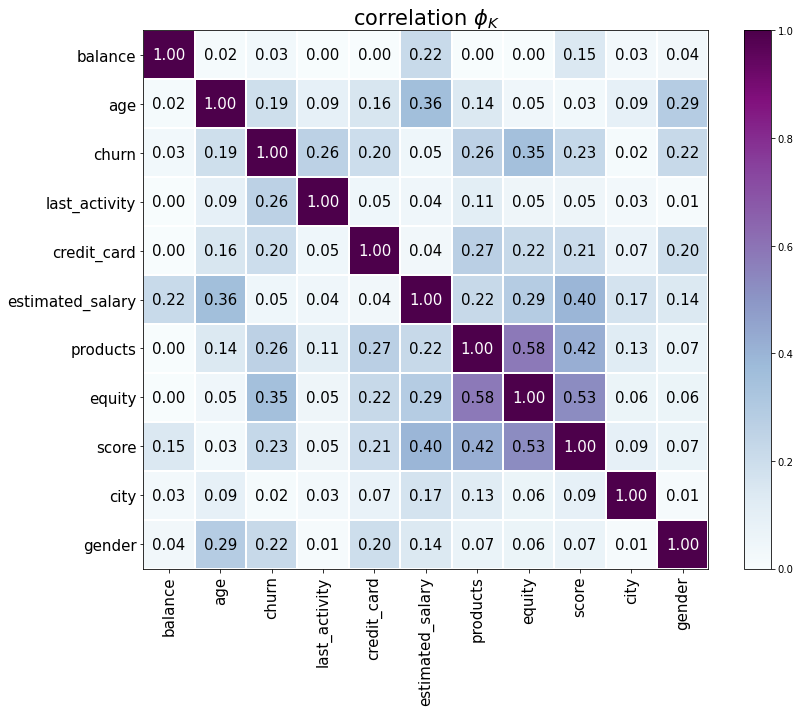

In [31]:
plot_correlation_matrix(phik_churn.values, 
                        x_labels=phik_churn.columns, 
                        y_labels=phik_churn.index, 
                        vmin=0, vmax=1, color_map="BuPu", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(12, 10))
plt.tight_layout()

**Шкала Чеддока — это шкала, которая используется для качественной оценки тесноты связи.**

Значения шкалы:

    0,1–0,3 — слабая связь;  
    0,3–0,5 — умеренная связь;  
    0,5–0,7 — заметная связь;  
    0,7–0,9 — высокая связь;  
    0,9–0,99 — весьма высокая связь.  
    
Показатель оттока имеет умеренную связь с показателями количества баллов собственности. Показатели баланса, зарплаты и города не связаны с показателем оттока. Остальные показатели слабо связаны с оттоком. 

## Проверка гипотез

### Гипотеза о равенстве средних доходов

**H0: Средний доход ушедших клиентов равен среднему доходу клиентов, которые остались.**  
**H1: Средний доход ушедших клиентов НЕ равен среднему доходу клиентов, которые остались.**

In [32]:
churned = df[df['churn'] == 1]['estimated_salary']
not_churned = df[df['churn'] == 0]['estimated_salary']

# Тест Шапиро-Уилка
shapiro_churned = shapiro(churned)
shapiro_not_churned = shapiro(not_churned)

if shapiro_churned.pvalue > 0.05 and shapiro_not_churned.pvalue > 0.05:
    print('Распределение нормальное')
else:
    print('Распределение ненормальное')

# Тест Левена
levene_test = levene(churned, not_churned)
print('Levene test:', levene_test)

if levene_test.pvalue > 0.05:
    print('Дисперсии равны')
    equal_var = True
else:
    print('Дисперсии не равны')
    equal_var = False

Распределение ненормальное
Levene test: LeveneResult(statistic=6.659643229714454, pvalue=0.009876226357398874)
Дисперсии не равны


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Вывод**
Тесты показали, что распределение ненормально, из-за чего необходимо использовать тест Манна-Уитни.  
Однако размер выборки большой и в соответствии с центральной предельной теоремой выборочное распределение среднего значения выборки приблизительно нормально, даже если распределение генеральной совокупности не является нормальным, поэтому можно использовать t-тест.

In [33]:
alpha=0.05
results = ttest_ind(churned, not_churned, equal_var=False)
print('p-value: ', results.pvalue)
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value:  0.8354803526840116
Не получилось отвергнуть нулевую гипотезу


**Вывод**  
Не можем сказать, что средние доходы клиентов ушедших из банка и оставшихся разные.

### Гипотеза о равенстве средних баллов собственности

**H0: Средние баллы собственности клиентов, которые остались в банке, равны средним баллам собственности клиентов, которые ушли.**  
**H1: Средние баллы собственности клиентов, которые остались в банке, отличаются от средних баллов собственности клиентов, которые ушли.**

In [34]:
churned_e = df[df['churn'] == 1]['equity']
not_churned_e = df[df['churn'] == 0]['equity']

# Тест Шапиро-Уилка
shapiro_churned_e = shapiro(churned_e)
shapiro_not_churned_e = shapiro(not_churned_e)

if shapiro_churned_e.pvalue > 0.05 and shapiro_not_churned_e.pvalue > 0.05:
    print('Распределение нормальное')
else:
    print('Распределение ненормальное')

# Тест Левена
levene_test_e = levene(churned_e, not_churned_e)
print('Levene test:', levene_test_e)

if levene_test_e.pvalue > 0.05:
    print('Дисперсии равны')
    equal_var = True
else:
    print('Дисперсии не равны')
    equal_var = False

Распределение ненормальное
Levene test: LeveneResult(statistic=414.5770409012039, pvalue=2.4996944163777595e-90)
Дисперсии не равны


C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [35]:
alpha=0.05
results = ttest_ind(churned_e, not_churned_e, equal_var=False)
print('p-value: ', results.pvalue)
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value:  2.2265321241808214e-196
Отвергаем нулевую гипотезу


**Вывод**  
Среднее количество баллов собственности клиентов, которые остались в банке, отличаются от среднего количества баллов собственности клиентов, которые ушли.


## Основные выводы

Основными показателями, влияющими на отток клиентов из банка, являются следующие:   

**1. Кредитный скоринг от 825 до 910;**  
**2. Возраст 24-36 и 50-60 лет;**  
**3. Количество баллов собственности от 3 и выше;**  
**4. Пол - мужской;**  
**5. Количество продуктов 3 и более;**  
**6. Отсутствие кредитной карты;**  
**7. Не активны в течение последних 30 дней.**

Заметная связь присутствует между показателями Кредитного скоринга и Количества баллов собственности: следует разделить данные показатели при сегментации.

Умеренная связь между показателями Количества продуктов и Наличием кредитной карты, что логично, т.к. при условии, что у человека имеется кредитная карта, он автоматически обладает +1 продуктом в банке.  

Умеренная связь между Количествои продуктов и Количеством баллов собственности

## Сегментация пользователей

In [36]:
# Сегмент 1: Клиенты в возрасте от 25 до 35, у которых нет кредитной карты 
segment_1 = df[(df['credit_card'] == 0) & ((df['age'] >= 24) & (df['age'] <= 36))]

# Сегмент 2: Мужчины, у которых 3 и более продукта в банке
segment_2 = df[(df['products'] >= 3) & (df['gender'] == 'М')]

# Сегмент 3: Клиенты в возрасте от 50 до 60 лет, у которых более 3 баллов собственности и кредитный скоринг от 835 до 910
segment_3 = df[((df['score'] >= 825) & (df['score'] <= 910)) & ((df['age'] >= 50) & (df['age'] <= 60)) & (df['equity'] >= 3)]

# Сегмент 4: Клиенты, у которых 3 и более продукта в банке, которые не были активны в течение последних 30 дней
segment_4 = df[(df['products'] >= 3)&(df['last_activity'] == 0)]

print('Cредний уровень оттока по банку: ', round(df['churn'].mean(), 2))

Cредний уровень оттока по банку:  0.18


In [37]:
# Функция для анализа сегментов
def analyze_segment(segment, segment_name):
    total_clients = segment.shape[0]
    churned_clients = segment[segment['churn'] == 1].shape[0]
    churn_rate = churned_clients / total_clients 
    print(f'{segment_name}:')
    print(f'Клиентов в сегменте: {total_clients}')
    print(f'Ушедшие клиенты в сегменте: {churned_clients}')
    print(f'Доля ушедших клиентов в сегменте: {churn_rate:.2%}\n')
    return total_clients, churned_clients, churn_rate

segments = {
    'Сегмент 1: Клиенты в возрасте от 24 до 36, у которых нет кредитной карты': segment_1,
    'Сегмент 2: Мужчины, у которых 3 и более продукта в банке': segment_2,
    'Сегмент 3: Клиенты в возрасте от 50 до 60 лет, у которых более 3 баллов собственности и кредитный скоринг от 835 до 910': segment_3,
    'Сегмент 4: Клиенты, у которых 3 и более продукта в банке, которые не были активны в течение последних 30 дней' : segment_4}

for segment_name, segment in segments.items():
    analyze_segment(segment, segment_name)

Сегмент 1: Клиенты в возрасте от 24 до 36, у которых нет кредитной карты:
Клиентов в сегменте: 966
Ушедшие клиенты в сегменте: 324
Доля ушедших клиентов в сегменте: 33.54%

Сегмент 2: Мужчины, у которых 3 и более продукта в банке:
Клиентов в сегменте: 752
Ушедшие клиенты в сегменте: 376
Доля ушедших клиентов в сегменте: 50.00%

Сегмент 3: Клиенты в возрасте от 50 до 60 лет, у которых более 3 баллов собственности и кредитный скоринг от 835 до 910:
Клиентов в сегменте: 562
Ушедшие клиенты в сегменте: 227
Доля ушедших клиентов в сегменте: 40.39%

Сегмент 4: Клиенты, у которых 3 и более продукта в банке, которые не были активны в течение последних 30 дней:
Клиентов в сегменте: 708
Ушедшие клиенты в сегменте: 214
Доля ушедших клиентов в сегменте: 30.23%



## Приоритизация сегментов

**Сегмент 2: Мужчины, у которых 3 и более продукта в банке**  
Высокая доля ушедших клиентов (50.00%)  
Значительное количество ушедших клиентов (376)

*Этот сегмент имеет наибольшую долю ушедших клиентов, что указывает на высокую вероятность оттока. Кроме того, 376 ушедших клиентов представляют собой значительное количество, что делает этот сегмент приоритетным для работы.*


**Сегмент 3: Клиенты в возрасте от 50 до 60 лет, у которых более 3 баллов собственности и кредитный скоринг от 835 до 910**   
Высокая доля ушедших клиентов (40.39%)  
Умеренное количество ушедших клиентов (227)  

*Несмотря на меньшее количество клиентов, чем в сегменте 1, этот сегмент имеет более высокую долю ушедших клиентов, что также указывает на высокую вероятность оттока.*

**Сегмент 1: Клиенты в возрасте от 24 до 36, у которых нет кредитной карты**  
Высокая доля ушедших клиентов (33.54%)  
Большое количество ушедших клиентов (324)

*Этот сегмент имеет большую базу клиентов и значительное количество ушедших клиентов. Хотя доля ушедших клиентов ниже, чем в сегменте 3, этот сегмент все еще важен для работы.*

**Сегмент 4: Клиенты, у которых 3 и более продукта в банке, которые не были активны в течение последних 30 дней**  
Умеренная доля ушедших клиентов (30.23%)  
Значительное количество ушедших клиентов (214)

*Этот сегмент имеет наименьшую долю ушедших клиентов среди всех сегментов, но количество ушедших клиентов все еще значительное. Этот сегмент будет последним в приоритете, но его не следует игнорировать.*

## Рекомендации

**Сегмент 2: Мужчины, у которых 3 и более продукта в банке**

1. Внедрение элементов геймификации в банковские продукты. Например, начисление "игровых" баллов за выполнение различных банковских операций, таких как регулярные переводы, пополнение счетов и использование кредитных карт. Соответственно, чем больше у клиента продуктов, тем больше вариаинтов получения баллов. Баллы затем можно обменивать на скидку у партнеров, которые в основном ориентированы на мужскую аудиторию: спортивные товары, строительные материалы, заправки и т.д.



2. Введение специальных кэшбэк-программ на категории, которые могут быть интересны мужчинам (спортивные товары, электроника, автоаксессуары и путешествия)


**Сегмент 3: Клиенты в возрасте от 50 до 60 лет, у которых более 3 баллов собственности и кредитный скоринг от 835 до 910** 

1. Партнерство с медицинскими учреждениями для предоставления скидок и бонусов на медицинские услуги, санатории и кэшбэков в аптеках.


2. Введение специализированных программ и консультаций по пенсионному планированию, которые помогут клиентам этой возрастной группы подготовиться к выходу на пенсию.

**Сегмент 1: Клиенты в возрасте от 24 до 36, у которых нет кредитной карты**  

1. Выпуск кредитных карт с особыми преимуществами для молодых клиентов (кэшбэк на образование, путешествия и т.д.) и беспроцентным обслуживание на первые 3 месяца.

**Сегмент 4: Клиенты, у которых 3 и более продукта в банке, которые не были активны в течение последних 30 дней**  

1. Предоставление клиентам временного доступа к премиальным услугам банка


2. Напоминание (уведомление) клиентам о специальных предложениях, которые действуют на их продукты (например, бонусы, начисляемые на счет за пользование продуктом в течение следующего месяца)

Ссылка на презентацию: <https://drive.google.com/file/d/1KkzYjsvQkVcQIYGxIHt-Fmo2G7q3rho0/view?usp=sharing>